# Exercício 3

Utilizando o dataset zoo.csv (disponível no repositório da disciplina), faça a classificação de todas as amostras dos animais presentes.  

Avalie a precisão, a acurácia e o melhor ‘k’ para este problema.  

Dica, para ler o arquivo csv utilize o seguinte comando:  
>
> zoo = pd.read_csv('c:/caminhodoarquivo/zoo.csv', engine='python')
>

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as sm
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
from itertools import cycle
from sklearn import datasets
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
# Importando os dados
zoo = pd.read_csv('bases/zoo.csv', engine='python')

zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


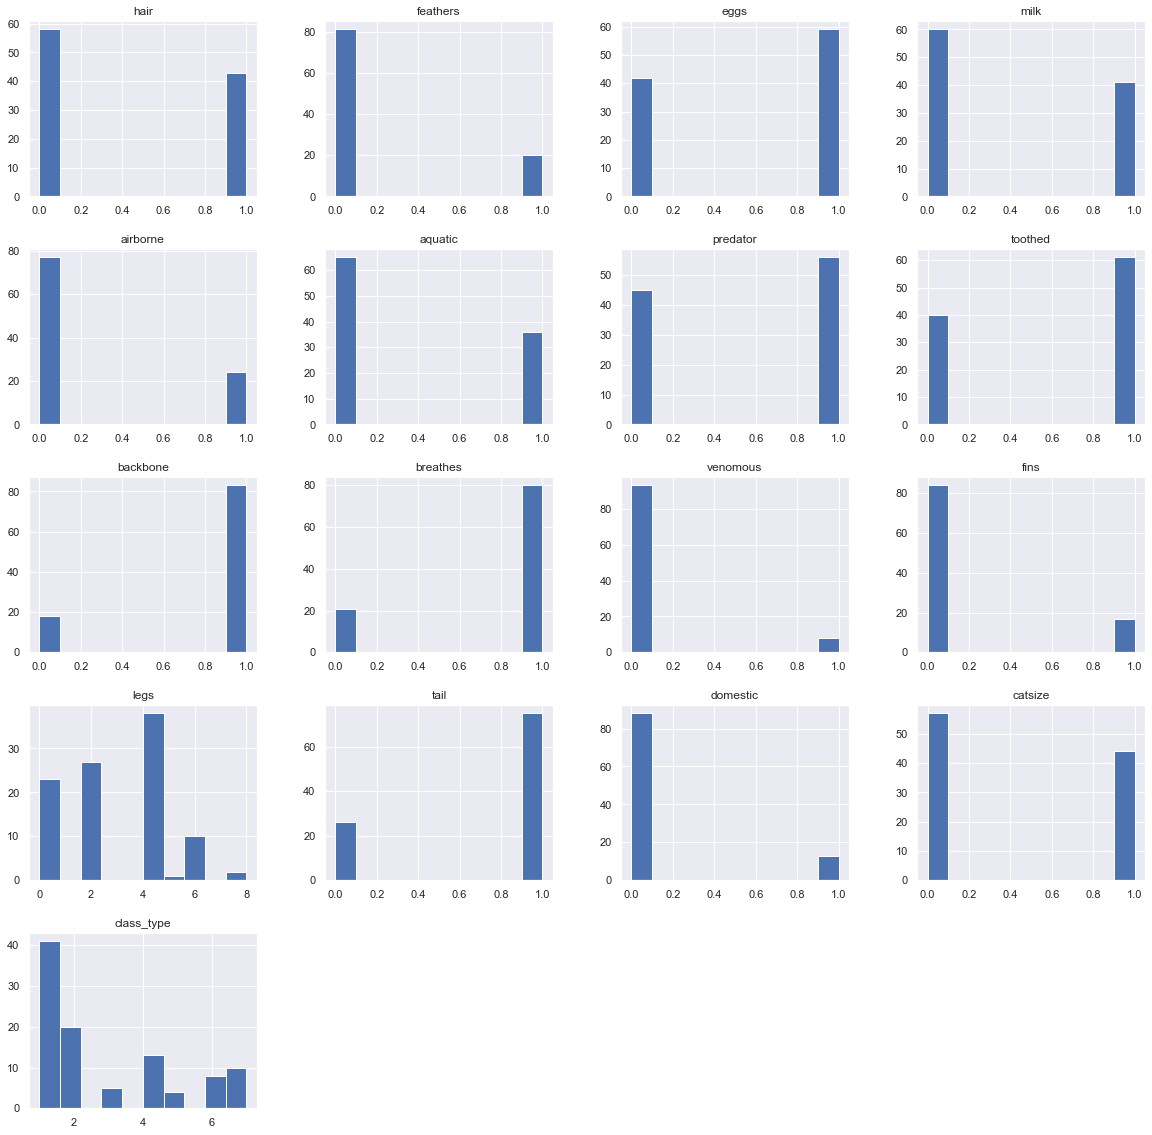

In [3]:
#fig = plt.figure(figsize = (20,20))
#ax = fig.gca()

zoo.hist(figsize = (20,20));

 Segundo o nosso entendimento o dataset apresenta as seguintes colunas:  
 
 - animal_name: nome do animal
 - hair: indicador se o animal possui pelos
 - feathers: indicador se o animal possui penas
 - eggs: indicador se o animal põem ovos
 - milk: indicador se o animal produz leite
 - airborne: indicador se o animal é voador
 - aquatic: indicador se o animal é aquático
 - predator: indicador se o animal é carnívoro
 - toothed: indicador se o animal possui dentes
 - backbone: indicador se o animal possui coluna vertebral
 - breathes: indicador se o animal possui respiração pulmonar
 - venomous: indicador se o animal produz veneno
 - fins: indicador se o animal possui barbatanas 
 - legs: quantidade de perans que o animal possui
 - tail: indicador se o animal possui cauda / rabo
 - domestic: indicador se o animal é domesticável 
 - catsize: indicador se o animal possui tamanho maior ou igual a um gato
 - class_type: classificação original do animal
 
 Como podemos ver dataset não possui valores faltantes e possui os dados tratados

In [4]:
# Analisando se existem valores faltantes
print(zoo.info(),'\n')

# Analisando a composição das variáveis numéricas
print(zoo.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None 

             hai

In [5]:
X = zoo.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]].values
y = zoo.iloc[:,17].values


# Normalização do Conjunto
X = MinMaxScaler().fit_transform(X)

# Agora dividir em treino e teste (teste com 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

     K     score
0    1  0.903226
1    2  0.903226
2    3  0.903226
3    4  0.903226
4    5  0.903226
5    6  0.870968
6    7  0.870968
7    8  0.870968
8    9  0.838710
9   10  0.838710
10  11  0.806452
11  12  0.806452 



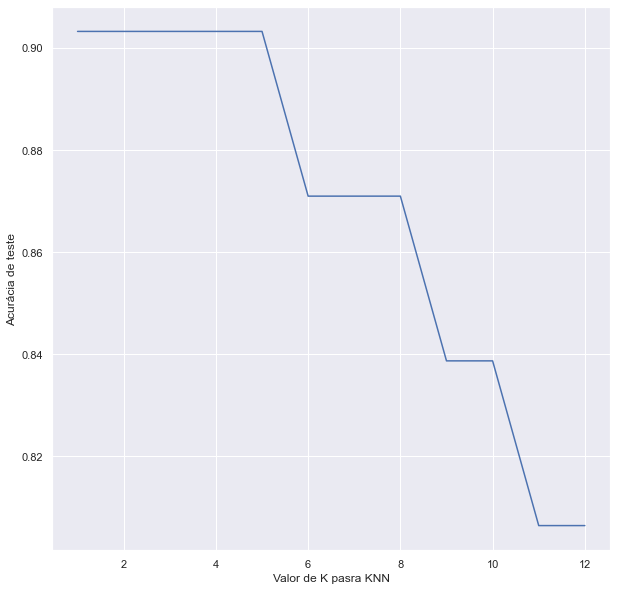

In [6]:
# testa do K=1 até K=48 
k_range = range(1, 13)

# Lista todas as acurácias
scores = []

# Faz um loop de 1 a 26 armazena no dicionário scores
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

df_scores = pd.DataFrame(data = {'K': k_range, 'score': scores})   
print(df_scores,'\n')

#Plota os valores de acc. em função do valor escolhido de K
plt.figure(1, figsize=(10,10))
plt.plot(k_range, scores)
plt.xlabel('Valor de K pasra KNN')
plt.ylabel('Acurácia de teste')
plt.show();

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         2
           7       1.00      0.50      0.67         6

    accuracy                           0.90        31
   macro avg       0.86      0.93      0.86        31
weighted avg       0.95      0.90      0.90        31


Acurácia: 0.9032258064516129 



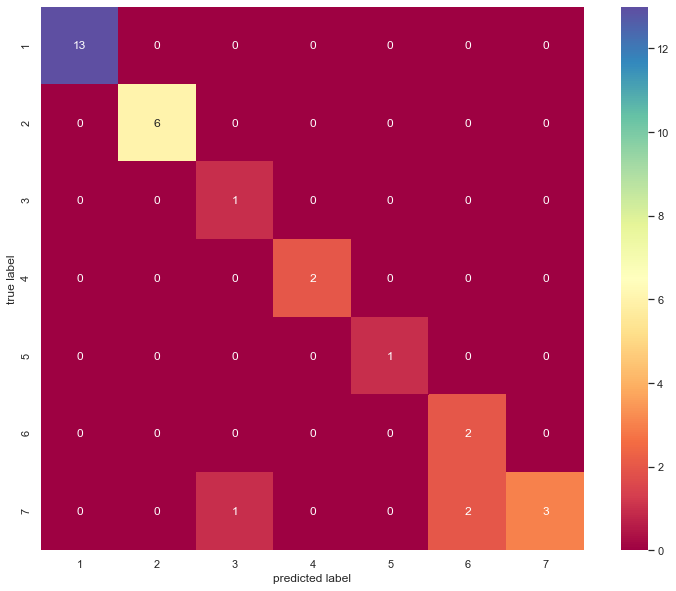

In [7]:
#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=5)
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot_confusion_matrix(best_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print('\nAcurácia:', accuracy_score(y_test, y_pred), '\n')

fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(cm, square=True, annot=True, fmt='d', 
            ax = ax, cmap="Spectral", 
            xticklabels=set(zoo['class_type']),
            yticklabels=set(zoo['class_type']) )
ax.set_ylabel('true label')
ax.set_xlabel('predicted label')
plt.show();

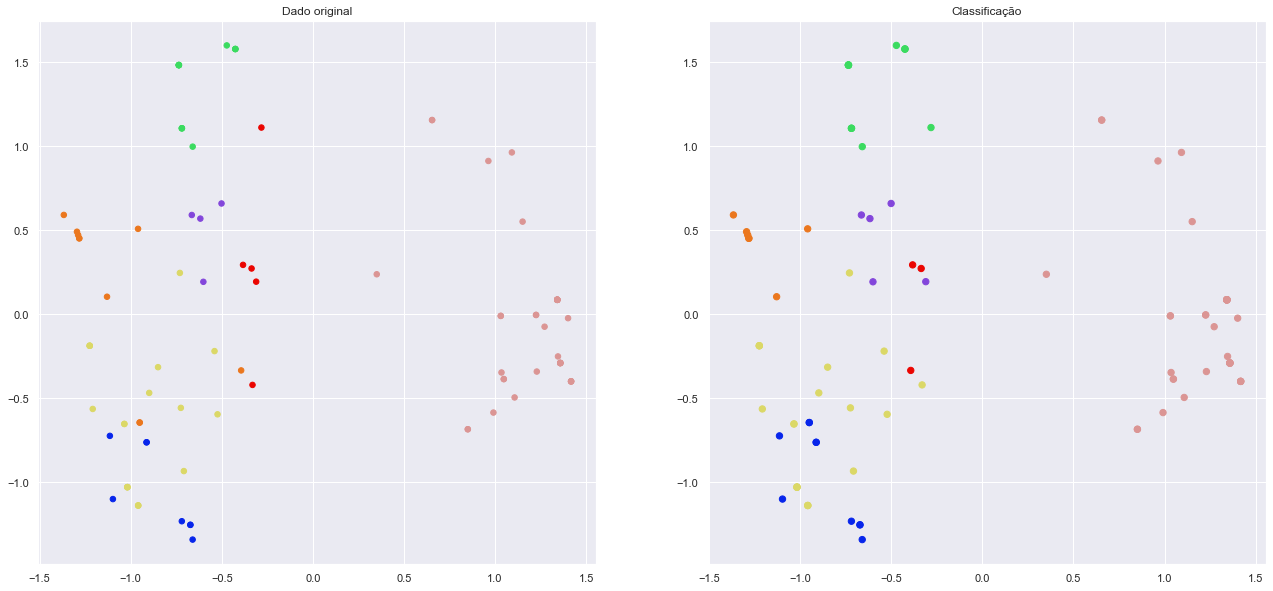

In [8]:
y_pred_ = best_KNN.predict(X)

pca = PCA(n_components=2).fit_transform(X)

colormap=np.array(['#000000','#DB9594','#DBD867','#EB0501','#3BDB60','#8346DB','#0725EB','#EB771E'])

f, (ax1, ax2) = plt.subplots(figsize = (22,10), ncols = 2)
ax1.scatter(pca[:,0], pca[:,1], c=colormap[y], s=30)
ax1.set_title('Dado original')

ax2.scatter(pca[:,0], pca[:,1], c=colormap[y_pred_], s=40)
ax2.set_title('Classificação')

plt.show();

# Avalie a precisão, a acurácia e o melhor ‘k’ para este problema.

A precisão das classes 3 e 6 foi de 50%, ou seja, metade das predições feitas para essas classes foi incorreta. As demais classes possuem precisão de 100%.  
Com 3 classificações incorretas em 31 amostras no conjunto de teste, temos uma acurácia total foi de 0,9032.  
Esta melhor acurácia permanece constante para os valores de K entre 1 e 5 (1 <= K <= 5).  